In [41]:

import os
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from sklearn.externals import joblib
%matplotlib inline
import seaborn as sns

DIR = 'PATH/TO/YOUR/DATA'
description = pd.read_csv(('HomeCredit_columns_description.csv'),encoding = 'latin1')
application = pd.read_csv('application_train.csv')
credit_card = pd.read_csv('credit_card_balance.csv')

In [42]:
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [43]:
credit_card.shape

(3840312, 23)

In [44]:

credit_card['AMT_DRAWINGS_ATM_CURRENT'][credit_card['AMT_DRAWINGS_ATM_CURRENT'] < 0] = np.nan
credit_card['AMT_DRAWINGS_CURRENT'][credit_card['AMT_DRAWINGS_CURRENT'] < 0] = np.nan

C:\Users\Umesh.k\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Umesh.k\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
credit_card['number_of_instalments'] = credit_card.groupby(
    by=['SK_ID_CURR', 'SK_ID_PREV'])['CNT_INSTALMENT_MATURE_CUM'].agg('max').reset_index()[
    'CNT_INSTALMENT_MATURE_CUM']

credit_card['credit_card_max_loading_of_credit_limit'] = credit_card.groupby(
    by=['SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT_LIMIT_ACTUAL']).apply(
    lambda x: x.AMT_BALANCE.max() / x.AMT_CREDIT_LIMIT_ACTUAL.max()).reset_index()[0]

C:\Users\Umesh.k\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Umesh.k\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars


In [46]:
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,number_of_instalments,credit_card_max_loading_of_credit_limit
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.0,1,0.0,1.0,35.0,Active,0,0,0.0,0.00000
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,1.0,1,0.0,0.0,69.0,Active,0,0,33.0,0.00000
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,0.0,0,0.0,0.0,30.0,Active,0,0,22.0,1.05000
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,1.0,1,0.0,0.0,10.0,Active,0,0,0.0,0.00000
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,0.0,1,0.0,1.0,101.0,Active,0,0,0.0,1.02489


In [47]:
description[description['Row'] == 'DAYS_CREDIT'].Description.tolist()

['How many days before current application did client apply for Credit Bureau credit']

In [48]:
features = pd.DataFrame({'SK_ID_CURR':credit_card['SK_ID_CURR'].unique()})
features.head()

,SK_ID_CURR
0,378907
1,363914
2,371185
3,337855
4,126868


In [49]:
group_object = credit_card.groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].agg('nunique').reset_index()
group_object.rename(index=str, columns={'SK_ID_PREV': 'credit_card_number_of_loans'},inplace=True)

features = features.merge(group_object, on=['SK_ID_CURR'], how='left')
features.head()

,SK_ID_CURR,credit_card_number_of_loans
0,378907,1
1,363914,1
2,371185,1
3,337855,1
4,126868,1


In [50]:
features.head(15)

,SK_ID_CURR,credit_card_number_of_loans
0,378907,1
1,363914,1
2,371185,1
3,337855,1
4,126868,1
5,380010,1
6,171320,1
7,118650,1
8,367360,1
9,203885,1


In [51]:
features['credit_card_number_of_loans'].value_counts()

1    102818
2       732
3         7
4         1
Name: credit_card_number_of_loans, dtype: int64

In [52]:
group_object= credit_card.groupby(by=['SK_ID_CURR'])['number_of_instalments'].sum().reset_index()
group_object.rename(index=str, columns={'number_of_instalments': 'credit_card_total_instalments'},inplace=True)

features = features.merge(group_object, on=['SK_ID_CURR'], how='left')
features.head()

,SK_ID_CURR,credit_card_number_of_loans,credit_card_total_instalments
0,378907,1,0.0
1,363914,1,94.0
2,371185,1,63.0
3,337855,1,0.0
4,126868,1,23.0


In [53]:
features['credit_card_total_instalments'].head(40)

0       0.0
1      94.0
2      63.0
3       0.0
4      23.0
5      55.0
6       0.0
7      96.0
8      20.0
9       0.0
10     18.0
11      5.0
12      0.0
13      7.0
14     28.0
15     65.0
16      7.0
17     77.0
18     64.0
19      0.0
20    145.0
21      0.0
22     58.0
23     42.0
24      8.0
25     65.0
26      8.0
27      0.0
28      0.0
29      0.0
30    158.0
31     10.0
32     22.0
33      0.0
34      6.0
35      6.0
36     74.0
37    114.0
38      0.0
39     22.0
Name: credit_card_total_instalments, dtype: float64

In [54]:
features[features['credit_card_total_instalments'] == 5.0]

,SK_ID_CURR,credit_card_number_of_loans,credit_card_total_instalments
11,340339,1,5.0
71,340224,1,5.0
79,183994,1,5.0
90,436212,1,5.0
100,318823,1,5.0
161,102143,1,5.0
165,375115,1,5.0
184,197559,1,5.0
199,144820,1,5.0
208,265577,1,5.0


In [55]:
features['credit_card_total_instalments'].value_counts()[:10]

0.0     59588
5.0      1541
6.0      1507
7.0      1431
8.0      1278
9.0      1167
10.0     1062
Name: credit_card_total_instalments, dtype: int64

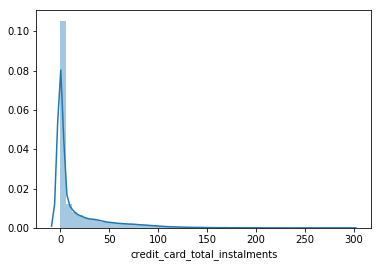

In [56]:
sns.distplot(features['credit_card_total_instalments'])

In [57]:
features['credit_card_installments_per_loan'] = (
    features['credit_card_total_instalments'] / features['credit_card_number_of_loans'])
    
features.head()

,SK_ID_CURR,credit_card_number_of_loans,credit_card_total_instalments,credit_card_installments_per_loan
0,378907,1,0.0,0.0
1,363914,1,94.0,94.0
2,371185,1,63.0,63.0
3,337855,1,0.0,0.0
4,126868,1,23.0,23.0


In [58]:
group_object = credit_card.groupby(by=['SK_ID_CURR'])['credit_card_max_loading_of_credit_limit'].agg('mean').reset_index()
group_object.rename(index=str, columns={'credit_card_max_loading_of_credit_limit': 'credit_card_avg_loading_of_credit_limit'},inplace=True)

features = features.merge(group_object, on=['SK_ID_CURR'], how='left')
features.head()

,SK_ID_CURR,credit_card_number_of_loans,credit_card_total_instalments,credit_card_installments_per_loan,credit_card_avg_loading_of_credit_limit
0,378907,1,0.0,0.0,0.696487
1,363914,1,94.0,94.0,0.202349
2,371185,1,63.0,63.0,0.525000
3,337855,1,0.0,0.0,0.000000
4,126868,1,23.0,23.0,1.043303


In [59]:
group_object = credit_card.groupby(
    by=['SK_ID_CURR'])['SK_DPD'].agg('mean').reset_index()
group_object.rename(index=str, columns={'SK_DPD': 'credit_card_average_of_days_past_due'},inplace=True)

features = features.merge(group_object, on=['SK_ID_CURR'], how='left')
features.head()

,SK_ID_CURR,credit_card_number_of_loans,credit_card_total_instalments,credit_card_installments_per_loan,credit_card_avg_loading_of_credit_limit,credit_card_average_of_days_past_due
0,378907,1,0.0,0.0,0.696487,0.127660
1,363914,1,94.0,94.0,0.202349,0.010417
2,371185,1,63.0,63.0,0.525000,0.000000
3,337855,1,0.0,0.0,0.000000,0.000000
4,126868,1,23.0,23.0,1.043303,0.010417


In [60]:

group_object = credit_card.groupby(by=['SK_ID_CURR'])['AMT_DRAWINGS_ATM_CURRENT'].agg('sum').reset_index()
group_object.rename(index=str, columns={'AMT_DRAWINGS_ATM_CURRENT': 'credit_card_drawings_atm'},inplace=True)

features = features.merge(group_object, on=['SK_ID_CURR'], how='left')
features.head()

,SK_ID_CURR,credit_card_number_of_loans,credit_card_total_instalments,credit_card_installments_per_loan,credit_card_avg_loading_of_credit_limit,credit_card_average_of_days_past_due,credit_card_drawings_atm
0,378907,1,0.0,0.0,0.696487,0.127660,67500.0
1,363914,1,94.0,94.0,0.202349,0.010417,293850.0
2,371185,1,63.0,63.0,0.525000,0.000000,506250.0
3,337855,1,0.0,0.0,0.000000,0.000000,50850.0
4,126868,1,23.0,23.0,1.043303,0.010417,763650.0


In [61]:
group_object = credit_card.groupby(by=['SK_ID_CURR'])['AMT_DRAWINGS_CURRENT'].agg('sum').reset_index()
group_object.rename(index=str, columns={'AMT_DRAWINGS_CURRENT': 'credit_card_drawings_total'},inplace=True)

features = features.merge(group_object, on=['SK_ID_CURR'], how='left')
features.head()

,SK_ID_CURR,credit_card_number_of_loans,credit_card_total_instalments,credit_card_installments_per_loan,credit_card_avg_loading_of_credit_limit,credit_card_average_of_days_past_due,credit_card_drawings_atm,credit_card_drawings_total
0,378907,1,0.0,0.0,0.696487,0.127660,67500.0,124941.645
1,363914,1,94.0,94.0,0.202349,0.010417,293850.0,358313.670
2,371185,1,63.0,63.0,0.525000,0.000000,506250.0,699566.715
3,337855,1,0.0,0.0,0.000000,0.000000,50850.0,259850.835
4,126868,1,23.0,23.0,1.043303,0.010417,763650.0,1372493.385


In [62]:
features['credit_card_cash_card_ratio'] = features['credit_card_drawings_atm'] / features['credit_card_drawings_total']

features.head(20)

,SK_ID_CURR,credit_card_number_of_loans,credit_card_total_instalments,credit_card_installments_per_loan,credit_card_avg_loading_of_credit_limit,credit_card_average_of_days_past_due,credit_card_drawings_atm,credit_card_drawings_total,credit_card_cash_card_ratio
0,378907,1,0.0,0.0,0.696487,0.127660,67500.0,124941.645,0.540252
1,363914,1,94.0,94.0,0.202349,0.010417,293850.0,358313.670,0.820092
2,371185,1,63.0,63.0,0.525000,0.000000,506250.0,699566.715,0.723662
3,337855,1,0.0,0.0,0.000000,0.000000,50850.0,259850.835,0.195689
4,126868,1,23.0,23.0,1.043303,0.010417,763650.0,1372493.385,0.556396
5,380010,1,55.0,55.0,0.000000,0.538462,288000.0,293040.000,0.982801
6,171320,1,0.0,0.0,0.000000,0.000000,405000.0,405000.000,1.000000
7,118650,1,96.0,96.0,0.856484,0.020833,90000.0,207000.000,0.434783
8,367360,1,20.0,20.0,0.165937,0.000000,301500.0,567037.440,0.531711
9,203885,1,0.0,0.0,0.000000,0.770833,476100.0,726090.660,0.655703


In [63]:
features.to_csv('df_credit_card_balance',index=False)

In [64]:
# credit_ONE = features[features['SK_ID_CURR']==215354]

In [65]:
# credit_ONE

In [66]:
# features.shape

(103558, 9)

In [67]:
# application.shape

In [68]:

# application = application.merge(features,
#                                 left_on=['SK_ID_CURR'],
#                                 right_on=['SK_ID_CURR'],
#                                 how='left',
#                                 validate='one_to_one')

In [69]:
# application.shape

In [70]:
# engineered_numerical_columns = list(features.columns)
# engineered_numerical_columns.remove('SK_ID_CURR')
# credit_eng = application[engineered_numerical_columns + ['TARGET']]
# credit_eng_corr = abs(credit_eng.corr())

In [71]:
# credit_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

In [72]:
# sns.heatmap(credit_eng_corr, 
#             xticklabels=credit_eng_corr.columns,
#             yticklabels=credit_eng_corr.columns)

In [73]:
# CREDIT_CARD_BALANCE_AGGREGATION_RECIPIES = []
# for agg in ['mean', 'min', 'max', 'sum', 'var']:
#     for select in ['AMT_BALANCE',
#                    'AMT_CREDIT_LIMIT_ACTUAL',
#                    'AMT_DRAWINGS_ATM_CURRENT',
#                    'AMT_DRAWINGS_CURRENT',
#                    'AMT_DRAWINGS_OTHER_CURRENT',
#                    'AMT_DRAWINGS_POS_CURRENT',
#                    'AMT_PAYMENT_CURRENT',
#                    'CNT_DRAWINGS_ATM_CURRENT',
#                    'CNT_DRAWINGS_CURRENT',
#                    'CNT_DRAWINGS_OTHER_CURRENT',
#                    'CNT_INSTALMENT_MATURE_CUM',
#                    'MONTHS_BALANCE',
#                    'SK_DPD',
#                    'SK_DPD_DEF'
#                    ]:
#         CREDIT_CARD_BALANCE_AGGREGATION_RECIPIES.append((select, agg))
# CREDIT_CARD_BALANCE_AGGREGATION_RECIPIES = [(['SK_ID_CURR'], CREDIT_CARD_BALANCE_AGGREGATION_RECIPIES)]

In [74]:
k=14*5
k

70

In [75]:
# groupby_aggregate_names = []
# for groupby_cols, specs in tqdm(CREDIT_CARD_BALANCE_AGGREGATION_RECIPIES):
#     group_object = credit_card.groupby(groupby_cols)
#     for select, agg in tqdm(specs):
#         groupby_aggregate_name = '{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
#         application = application.merge(group_object[select]
#                               .agg(agg)
#                               .reset_index()
#                               .rename(index=str,
#                                       columns={select: groupby_aggregate_name})
#                               [groupby_cols + [groupby_aggregate_name]],
#                               on=groupby_cols,
#                               how='left')
#         groupby_aggregate_names.append(groupby_aggregate_name)

In [76]:
# application.head()

In [77]:
# application.shape

In [78]:
# application_agg = application[groupby_aggregate_names + ['TARGET']]
# application_agg_corr = abs(application_agg.corr())

In [79]:
# application_agg.head()

In [80]:
# application_agg_corr.sort_values('TARGET', ascending=False)['TARGET']